In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.xarray

In [2]:
import xmitgcm
xmitgcm.file_utils.clear_cache()

In [3]:
rundir = '/rigel/ocp/users/ra2697/tutorial_barotropic_gyre/run'
ds = xmitgcm.open_mdsdataset(rundir, iters=72*np.arange(1,201),
                             delta_t=1200, calendar='360_day', ref_date='0000-01-01 00:00:00')
ds

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:845: UserWarning: Couldn't find available_diagnostics.log in /rigel/ocp/users/ra2697/tutorial_barotropic_gyre/run or /rigel/ocp/users/ra2697/tutorial_barotropic_gyre/run. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on th

<xarray.Dataset>
Dimensions:  (XC: 62, XG: 62, YC: 62, YG: 62, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 200)
Coordinates:
  * XC       (XC) >f4 -10000.0 10000.0 30000.0 ... 1170000.0 1190000.0 1210000.0
  * YC       (YC) >f4 -10000.0 10000.0 30000.0 ... 1170000.0 1190000.0 1210000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * Z        (Z) >f4 -2500.0
  * Zp1      (Zp1) >f4 0.0 -5000.0
  * Zu       (Zu) >f4 -5000.0
  * Zl       (Zl) >f4 0.0
    rA       (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAz      (YG, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxC      (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyC      (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAw      (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAs      (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF   (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    hFacC    (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacW    (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacS    (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskC    (YC, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskW    (YC, XG) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskS    (YG, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
Data variables:
    V        (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    U        (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Eta      (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PHL      (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    T        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PH       (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    W        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    S        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>

In [4]:
ds.time

<xarray.DataArray 'time' (time: 200)>
array([cftime.Datetime360Day(0000-01-02 00:00:00),
       cftime.Datetime360Day(0000-01-03 00:00:00),
       cftime.Datetime360Day(0000-01-04 00:00:00),
       cftime.Datetime360Day(0000-01-05 00:00:00),
       cftime.Datetime360Day(0000-01-06 00:00:00),
       cftime.Datetime360Day(0000-01-07 00:00:00),
       cftime.Datetime360Day(0000-01-08 00:00:00),
       cftime.Datetime360Day(0000-01-09 00:00:00),
       cftime.Datetime360Day(0000-01-10 00:00:00),
       cftime.Datetime360Day(0000-01-11 00:00:00),
       cftime.Datetime360Day(0000-01-12 00:00:00),
       cftime.Datetime360Day(0000-01-13 00:00:00),
       cftime.Datetime360Day(0000-01-14 00:00:00),
       cftime.Datetime360Day(0000-01-15 00:00:00),
       cftime.Datetime360Day(0000-01-16 00:00:00),
       cftime.Datetime360Day(0000-01-17 00:00:00),
       cftime.Datetime360Day(0000-01-18 00:00:00),
       cftime.Datetime360Day(0000-01-19 00:00:00),
       cftime.Datetime360Day(0000-01-20 00:00:00),
       cftime.Datetime360Day(0000-01-21 00:00:00),
       cftime.Datetime360Day(0000-01-22 00:00:00),
       cftime.Datetime360Day(0000-01-23 00:00:00),
       cftime.Datetime360Day(0000-01-24 00:00:00),
       cftime.Datetime360Day(0000-01-25 00:00:00),
       cftime.Datetime360Day(0000-01-26 00:00:00),
       cftime.Datetime360Day(0000-01-27 00:00:00),
       cftime.Datetime360Day(0000-01-28 00:00:00),
       cftime.Datetime360Day(0000-01-29 00:00:00),
       cftime.Datetime360Day(0000-01-30 00:00:00),
       cftime.Datetime360Day(0000-02-01 00:00:00),
       cftime.Datetime360Day(0000-02-02 00:00:00),
       cftime.Datetime360Day(0000-02-03 00:00:00),
       cftime.Datetime360Day(0000-02-04 00:00:00),
       cftime.Datetime360Day(0000-02-05 00:00:00),
       cftime.Datetime360Day(0000-02-06 00:00:00),
       cftime.Datetime360Day(0000-02-07 00:00:00),
       cftime.Datetime360Day(0000-02-08 00:00:00),
       cftime.Datetime360Day(0000-02-09 00:00:00),
       cftime.Datetime360Day(0000-02-10 00:00:00),
       cftime.Datetime360Day(0000-02-11 00:00:00),
       cftime.Datetime360Day(0000-02-12 00:00:00),
       cftime.Datetime360Day(0000-02-13 00:00:00),
       cftime.Datetime360Day(0000-02-14 00:00:00),
       cftime.Datetime360Day(0000-02-15 00:00:00),
       cftime.Datetime360Day(0000-02-16 00:00:00),
       cftime.Datetime360Day(0000-02-17 00:00:00),
       cftime.Datetime360Day(0000-02-18 00:00:00),
       cftime.Datetime360Day(0000-02-19 00:00:00),
       cftime.Datetime360Day(0000-02-20 00:00:00),
       cftime.Datetime360Day(0000-02-21 00:00:00),
       cftime.Datetime360Day(0000-02-22 00:00:00),
       cftime.Datetime360Day(0000-02-23 00:00:00),
       cftime.Datetime360Day(0000-02-24 00:00:00),
       cftime.Datetime360Day(0000-02-25 00:00:00),
       cftime.Datetime360Day(0000-02-26 00:00:00),
       cftime.Datetime360Day(0000-02-27 00:00:00),
       cftime.Datetime360Day(0000-02-28 00:00:00),
       cftime.Datetime360Day(0000-02-29 00:00:00),
       cftime.Datetime360Day(0000-02-30 00:00:00),
       cftime.Datetime360Day(0000-03-01 00:00:00),
       cftime.Datetime360Day(0000-03-02 00:00:00),
       cftime.Datetime360Day(0000-03-03 00:00:00),
       cftime.Datetime360Day(0000-03-04 00:00:00),
       cftime.Datetime360Day(0000-03-05 00:00:00),
       cftime.Datetime360Day(0000-03-06 00:00:00),
       cftime.Datetime360Day(0000-03-07 00:00:00),
       cftime.Datetime360Day(0000-03-08 00:00:00),
       cftime.Datetime360Day(0000-03-09 00:00:00),
       cftime.Datetime360Day(0000-03-10 00:00:00),
       cftime.Datetime360Day(0000-03-11 00:00:00),
       cftime.Datetime360Day(0000-03-12 00:00:00),
       cftime.Datetime360Day(0000-03-13 00:00:00),
       cftime.Datetime360Day(0000-03-14 00:00:00),
       cftime.Datetime360Day(0000-03-15 00:00:00),
       cftime.Datetime360Day(0000-03-16 00:00:00),
       cftime.Datetime360Day(0000-03-17 00:00:00),
       cftime.Datetime360Day(0000-03-18 00:00:00),
       cftime.Datetime360Day(0000-0

In [5]:
import xgcm
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(ds, metrics=metrics)
grid

<xgcm.Grid>
Y Axis (periodic):
  * center   YC --> left
  * left     YG --> center
Z Axis (periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center
T Axis (periodic):
  * center   time

In [6]:
U_center = grid.interp(ds.U, 'X', boundary='fill')
V_center = grid.interp(ds.V, 'Y', boundary='fill')

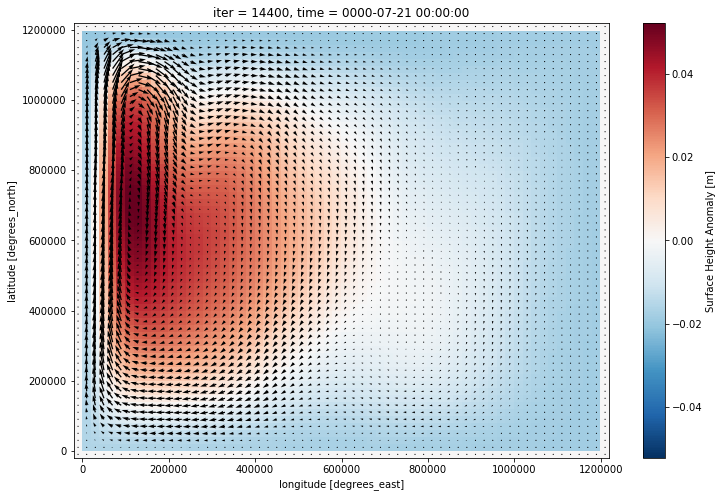

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ds.Eta[-1].plot(ax=ax)
ax.quiver(ds.XC, ds.YC, U_center[-1], V_center[-1])

In [8]:
ψ = -grid.cumint(ds.U * ds.drF[0], 'Y', boundary='fill')/1e6
ψ

<xarray.DataArray 'concatenate-a8ef439f128d4cb1cebd8d6c92cb1c66' (time: 200, YG: 62, XG: 62)>
dask.array<truediv, shape=(200, 62, 62), dtype=float32, chunksize=(1, 61, 62), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

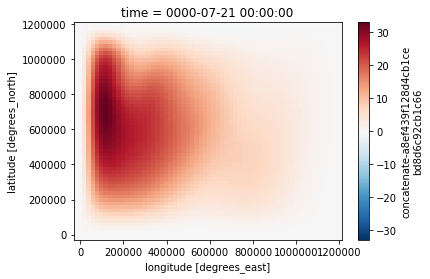

In [9]:
ψ[-1].plot()

In [10]:
ψ.hvplot(x='XG', y='YG',
         widget_type='scrubber', widget_location='bottom',
         width=600, height=400, cmap='Reds', clim=(0, 25))

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=199, width=550)
        [2] HSpacer()

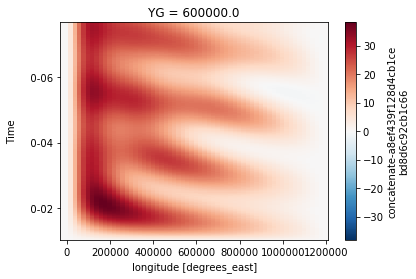

In [11]:
ψ.sel(YG=6e5, method='nearest').load().plot()

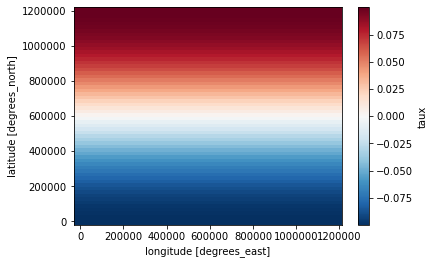

In [12]:
# read wind stress
taux_data = np.fromfile(f'{rundir}/windx_cosy.bin', dtype='>f4')
taux_data.shape = ds.rA.shape
ds['taux'] = ('YC', 'XG'), taux_data
ds.taux.plot()